_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_69 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 6s 93us/step - loss: 0.4744 - acc: 0.8746
Epoch 2/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.3039 - acc: 0.9157
Epoch 3/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.2830 - acc: 0.9204
Epoch 4/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.2725 - acc: 0.9239
Epoch 5/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.2664 - acc: 0.9259


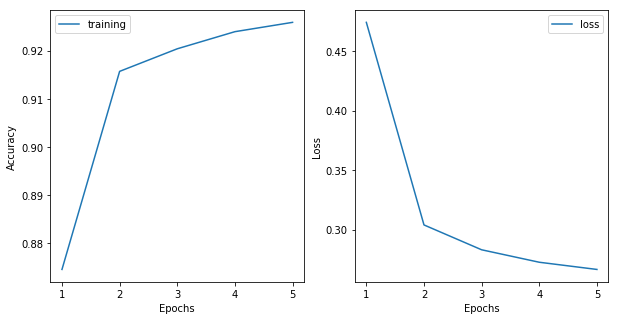

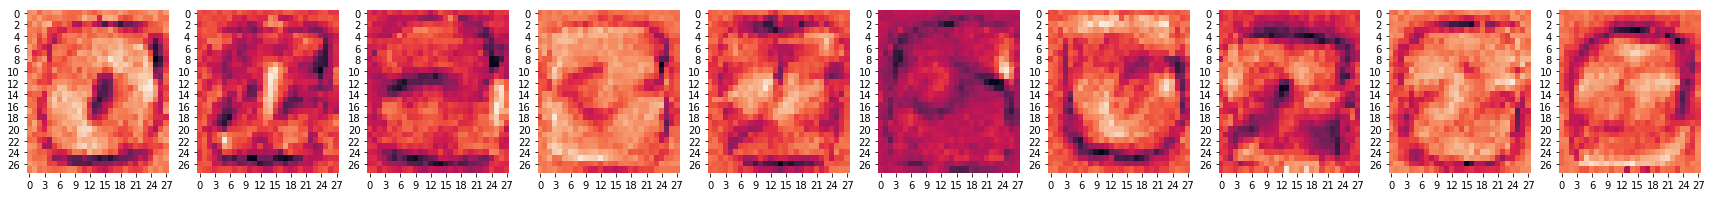

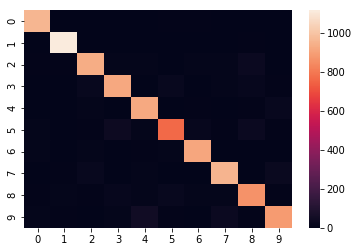

In [76]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
np.set_printoptions(threshold=np.inf)

import seaborn as sns


def plot_train_history(result):
    """
    Plot of train history.
    :param result: return value of "model.fit()" function.
    """
    # initialize subplot
    fig, axs = plt.subplots(1, 2, figsize=(10, 5)) # 1 row, 2 columns, width = 10, height = 5
    
    # setting of plot 1
    axs[0].plot(range(1, epochs+1), result.history['acc'], label="training")
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend()
    
    # setting of plot 2
    axs[1].plot(range(1, epochs+1), result.history['loss'], label="loss")
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Loss')
    axs[1].legend()
    
    # show plot
    plt.show()

    
def plot_heatmap(pred, class_num):
    """
    Plot heat map.
    :param pred: return value of "model.predict()" function.
    :param class_num: number of classes.
    """
    pred_matrix = np.zeros((class_num, class_num))
    
    for i in range(len(y_test)):
        pred_matrix[y_test[i]][np.argmax(pred[i])] += 1

    f, axes = plt.subplots(1, 1)
    sns.heatmap(pred_matrix)


def plot_model_weights(model):
    """
    Plot weights of the model.
    :param model: keras NN model.
    """
    class_num = 10 # number of classes
    width = 28     # image width
    height = 28    # image height
    
    w1 = model.layers[1].get_weights()[0].T # weight between input layer and output layer 
    t1 = model.layers[1].get_weights()[1] # ?
    # ref: https://qiita.com/shyne/items/31721724820dcfae4baf

    f, axes = plt.subplots(1, class_num, figsize=(30, 3))
    for i in range(class_num):
        w = w1[i]
        w = w.reshape(width, height)
        sns.heatmap(w, cbar=False, ax=axes[i])


if __name__ == '__main__':
    (x_train, y_train),(x_test, y_test) = mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0

    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      # tf.keras.layers.Dense(512, activation=tf.nn.relu),
      # tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train
    epochs = 5
    result = model.fit(x_train, y_train, epochs=epochs)
    plot_train_history(result)
    plot_model_weights(model)

    # predict
    pred = model.predict(x_test)
    plot_heatmap(pred, 10)

